In [11]:
## TRAINING DATA PULL (MAY - JULY 2024 - 5 MINS)

from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract
import threading
import time
import pandas as pd

class IBApi(EWrapper, EClient):
    def __init__(self):
        EClient.__init__(self, self)
        self.data = []  # Store data
        self.data_retrieved = False  # Flag to check if data retrieval is complete

    def historicalData(self, reqId, bar):
        self.data.append({
            "Date": bar.date,
            "Open": bar.open,
            "High": bar.high,
            "Low": bar.low,
            "Close": bar.close,
            "Volume": bar.volume
        })

    def historicalDataEnd(self, reqId, start, end):
        print("Historical Data Ended")
        self.df = pd.DataFrame(self.data)
        self.data_retrieved = True  # Set the flag to True to indicate data retrieval completion
        self.disconnect()

class IBApp:
    def __init__(self):
        self.app = IBApi()

    def connect(self):
        self.app.connect("127.0.0.1", 7496, 0)
        thread = threading.Thread(target=self.run_app, daemon=True)
        thread.start()
        time.sleep(1)

    def run_app(self):
        self.app.run()

    def request_training_data(self):
        contract = Contract()
        contract.symbol = "CL"
        contract.secType = "FUT"
        contract.exchange = "NYMEX"
        contract.currency = "USD"
        contract.lastTradeDateOrContractMonth = "202412"  # November 2024 contract

        # Set parameters for data pull
        end_date = "20230730 23:59:59 UTC"  # Example end date in UTC
        duration = "3 M"  # 1 month duration
        bar_size = "5 mins"

        # Record start time
        start_time = time.time()

        # Request historical data
        self.app.reqHistoricalData(
            reqId=1,
            contract=contract,
            endDateTime=end_date,
            durationStr=duration,
            barSizeSetting=bar_size,
            whatToShow='TRADES',
            useRTH=0,
            formatDate=1,
            keepUpToDate=False,
            chartOptions=[]
        )

        # Wait until data retrieval is complete
        while not self.app.data_retrieved:
            time.sleep(0.1)  # Small sleep interval to prevent busy-waiting

        # Record end time and calculate elapsed time
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Time taken to pull data: {elapsed_time:.2f} seconds")

    def disconnect(self):
        self.app.disconnect()

# Instantiate and connect the app
app = IBApp()
app.connect()

# Request training data
app.request_training_data()

# Access the DataFrame
train_data = app.app.df if hasattr(app.app, 'df') else pd.DataFrame()

# Disconnect from API
app.disconnect()

# Display the training data
print(train_data.head())

ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:usfuture
ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefnj


Historical Data Ended
Time taken to pull data: 48.37 seconds
                 Date   Open   High    Low  Close  Volume
0  20230502  18:25:00  66.59  66.59  66.59  66.59       1
1  20230502  18:30:00  66.59  66.59  66.59  66.59       0
2  20230502  18:35:00  66.59  66.59  66.59  66.59       0
3  20230502  18:40:00  66.59  66.59  66.59  66.59       0
4  20230502  18:45:00  66.59  66.59  66.59  66.59       0


In [16]:
#train_data.to_csv("3_month_training_data.csv")
len(train_data)

17535

In [21]:
## TESTING DATA (AUGUST - OCTOBER 2024 - 5 MINS)

from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract
import threading
import time
import pandas as pd

class IBApi(EWrapper, EClient):
    def __init__(self):
        EClient.__init__(self, self)
        self.data = []  # Store data
        self.data_retrieved = False  # Flag to check if data retrieval is complete

    def historicalData(self, reqId, bar):
        self.data.append({
            "Date": bar.date,
            "Open": bar.open,
            "High": bar.high,
            "Low": bar.low,
            "Close": bar.close,
            "Volume": bar.volume
        })

    def historicalDataEnd(self, reqId, start, end):
        print("Historical Data Ended")
        self.df = pd.DataFrame(self.data)
        self.data_retrieved = True  # Set the flag to True to indicate data retrieval completion
        self.disconnect()

class IBApp:
    def __init__(self):
        self.app = IBApi()

    def connect(self):
        self.app.connect("127.0.0.1", 7496, 0)
        thread = threading.Thread(target=self.run_app, daemon=True)
        thread.start()
        time.sleep(1)

    def run_app(self):
        self.app.run()

    def request_training_data(self):
        contract = Contract()
        contract.symbol = "CL"
        contract.secType = "FUT"
        contract.exchange = "NYMEX"
        contract.currency = "USD"
        contract.lastTradeDateOrContractMonth = "202412"  # November 2024 contract

        # Set parameters for data pull
        end_date = "20241031 23:59:59 UTC"  # Example end date in UTC
        duration = "3 M"  # 1 month duration
        bar_size = "5 mins"

        # Record start time
        start_time = time.time()

        # Request historical data
        self.app.reqHistoricalData(
            reqId=1,
            contract=contract,
            endDateTime=end_date,
            durationStr=duration,
            barSizeSetting=bar_size,
            whatToShow='TRADES',
            useRTH=0,
            formatDate=1,
            keepUpToDate=False,
            chartOptions=[]
        )

        # Wait until data retrieval is complete
        while not self.app.data_retrieved:
            time.sleep(0.1)  # Small sleep interval to prevent busy-waiting

        # Record end time and calculate elapsed time
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Time taken to pull data: {elapsed_time:.2f} seconds")

    def disconnect(self):
        self.app.disconnect()

# Instantiate and connect the app
app = IBApp()
app.connect()

# Request testing data
app.request_training_data()

# Access the DataFrame
test_data = app.app.df if hasattr(app.app, 'df') else pd.DataFrame()

# Disconnect from API
app.disconnect()

# Display the testing data
print(test_data.head())

ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:usfuture
ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefnj


Historical Data Ended
Time taken to pull data: 36.40 seconds
                 Date   Open   High    Low  Close  Volume
0  20240804  18:00:00  71.99  72.30  71.99  72.21      95
1  20240804  18:05:00  72.15  72.15  71.86  71.86     214
2  20240804  18:10:00  71.88  71.94  71.85  71.94      65
3  20240804  18:15:00  71.85  71.87  71.63  71.77      63
4  20240804  18:20:00  71.75  71.75  71.70  71.73      66


In [25]:
test_data.to_csv("3_month_testing_data.csv")

In [33]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the training data
training_data = pd.read_csv("3_month_training_data.csv")
testing_data = pd.read_csv("3_month_testing_data.csv")

# Preprocess the data: Drop unnecessary columns and separate features and target
# For both training and testing data, drop "Unnamed: 0" and "Date" columns
training_data = training_data.drop(columns=["Unnamed: 0", "Date"])
testing_data = testing_data.drop(columns=["Unnamed: 0", "Date"])

# Split into features (X) and target (y) for both datasets
X_train = training_data.drop(columns=["Close"])
y_train = training_data["Close"]
X_test = testing_data.drop(columns=["Close"])
y_test = testing_data["Close"]

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Optionally, view a few predictions
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(predictions.head())

Mean Squared Error (MSE): 0.14
Mean Absolute Error (MAE): 0.14
   Actual  Predicted
0   72.21   72.13747
1   71.86   72.09486
2   71.94   71.88940
3   71.77   71.83409
4   71.73   71.71240


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Use best_model to make predictions
y_pred = best_model.predict(X_test)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [49]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate performance with metrics like Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Best Model MSE: {mse:.2f}")
print(f"Best Model MAE: {mae:.2f}")
print("Best Hyperparameters:", grid_search.best_params_)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Close_lag_1


In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create a lagged feature for Close price
training_data['Close_lag_1'] = training_data['Close'].shift(1)
training_data.dropna(inplace=True)  # Drop rows with NaN values after shifting

# Do the same for testing data
testing_data['Close_lag_1'] = testing_data['Close'].shift(1)
testing_data.dropna(inplace=True)

# Update X_train and X_test with new features
X_train = training_data.drop(columns=["Close"])
y_train = training_data["Close"]
X_test = testing_data.drop(columns=["Close"])
y_test = testing_data["Close"]

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Optionally, view a few predictions
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(predictions.head())

Mean Squared Error (MSE): 0.14
Mean Absolute Error (MAE): 0.14
   Actual  Predicted
1   71.86   72.12295
2   71.94   71.88483
3   71.77   71.83399
4   71.73   71.71186
5   71.79   71.79762


In [47]:
!pip install xgboost
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Evaluate the XGBoost model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"XGBoost MSE: {mse:.2f}, MAE: {mae:.2f}")

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 2.1/124.9 MB 11.8 MB/s eta 0:00:11
   - -------------------------------------- 4.2/124.9 MB 10.1 MB/s eta 0:00:13
   -- ------------------------------------- 6.6/124.9 MB 10.6 MB/s eta 0:00:12
   -- ------------------------------------- 8.4/124.9 MB 10.0 MB/s eta 0:00:12
   --- ------------------------------------ 10.7/124.9 MB 10.0 MB/s eta 0:00:12
   ---- ----------------------------------- 13.1/124.9 MB 10.1 MB/s eta 0:00:12
   ---- ----------------------------------- 15.5/124.9 MB 10.4 MB/s eta 0:00:11
   ----- ---------------------------------- 17.8/124.9 MB 10.5 MB/s eta 0:00:11
   ------ --------------------------------- 19.9/124.9 MB 10.5 MB/s eta 0:00:11
   ------- -------------------------------- 22.0/124.9 MB 10.5 MB/s eta 0:00:10
   ------- -------------------------------- 24.4/124.9 MB 10.4 MB/s eta 0:00:10
   -------- ------------------------------- 26.7/124.

In [ ]:
## As we can see this training model is not as good as RandomForest

In [51]:
#!pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 2.1/390.3 MB 11.7 MB/s eta 0:00:34
   ---------------------------------------- 4.5/390.3 MB 11.2 MB/s eta 0:00:35
    --------------------------------------- 7.1/390.3 MB 11.5 MB/s eta 0:00:34
    --------------------------------------- 9.4/390.3 MB 11.3 MB/s eta 0:00:34
   - -------------------------------------- 11.5/390.3 MB 11.1 MB/s eta 0:00:35
   - -------------------------------------- 14.2/390.3 MB 11.1 MB/s eta 0:00:34
   - -------------------------------------- 16.5/390.3 MB 11.2 MB/s eta 0:00:34
   - -------------------------------------- 18.9/390.3 MB 11.1 MB/s eta 0:00:34
   -- ------------------------------------- 21.2/390.3 MB 11.2 MB/s eta 0:00:33
   -- ------------------------------------- 23.6/390.3 MB 11.1 MB/s eta 0:00:33
   -- ------------------------------------- 26.0/390.3 MB 11.0 MB/s eta 0:00:34
   -- ------------------------------------- 28.3/390.

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load the training and testing data
training_data = pd.read_csv("3_month_training_data.csv")
testing_data = pd.read_csv("3_month_testing_data.csv")

# Preprocess data
training_data = training_data.drop(columns=["Unnamed: 0", "Date"])
testing_data = testing_data.drop(columns=["Unnamed: 0", "Date"])

# Separate features and target
X_train = training_data.drop(columns=["Close"]).values
y_train = training_data["Close"].values
X_test = testing_data.drop(columns=["Close"]).values
y_test = testing_data["Close"].values

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,  # Increase epochs if necessary
    batch_size=32,
    validation_split=0.2,  # Use 20% of training data for validation
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Neural Network MSE: {mse:.2f}")
print(f"Neural Network MAE: {mae:.2f}")

# Optionally, view a few predictions
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(predictions.head())

Epoch 1/100


C:\Users\gwitt\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


370/370 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3027.9695 - mae: 50.1166 - val_loss: 580.0393 - val_mae: 17.1352
Epoch 2/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33.9868 - mae: 3.1780 - val_loss: 549.8928 - val_mae: 17.4320
Epoch 3/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.0077 - mae: 1.4031 - val_loss: 417.2844 - val_mae: 15.0162
Epoch 4/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8638 - mae: 0.6774 - val_loss: 341.3333 - val_mae: 13.4354
Epoch 5/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4493 - mae: 0.3370 - val_loss: 294.7268 - val_mae: 12.3450
Epoch 6/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1663 - mae: 0.2110 - val_loss: 263.7179 - val_mae: 11.5672
Epoch 7/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1182 - mae: 0.1657 - val_loss: 244.0993 - val_mae: 11.0653
Epoch 8/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0743 - mae: 0.1364 - val_loss: 227.4102 - val_mae: 10.6388
Epoch 9/100
370/370 ━━━━━━━━━━━

In [ ]:
## This neural net is not predicting well.
## Trying more layers and adjusting parameters to achieve better performace.
## After I will increase training data set

Epoch 1/200


C:\Users\gwitt\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


423/423 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3852.1824 - mae: 61.9999 - val_loss: 3515.2375 - val_mae: 59.2741 - learning_rate: 0.0010
Epoch 2/200
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2753.3269 - mae: 52.4275 - val_loss: 2607.4280 - val_mae: 51.0452 - learning_rate: 0.0010
Epoch 3/200
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1982.6472 - mae: 44.4829 - val_loss: 1913.1995 - val_mae: 43.7194 - learning_rate: 0.0010
Epoch 4/200
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1394.3098 - mae: 37.2939 - val_loss: 1371.3447 - val_mae: 37.0071 - learning_rate: 0.0010
Epoch 5/200
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 947.0174 - mae: 30.7234 - val_loss: 954.2966 - val_mae: 30.8623 - learning_rate: 0.0010
Epoch 6/200
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 614.4689 - mae: 24.7321 - val_loss: 641.4285 - val_mae: 25.2906 - learning_rate: 0.0010
Epoch 7/200
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 374.7214 - mae: 19.2935 - val_loss: 414.7923 - va

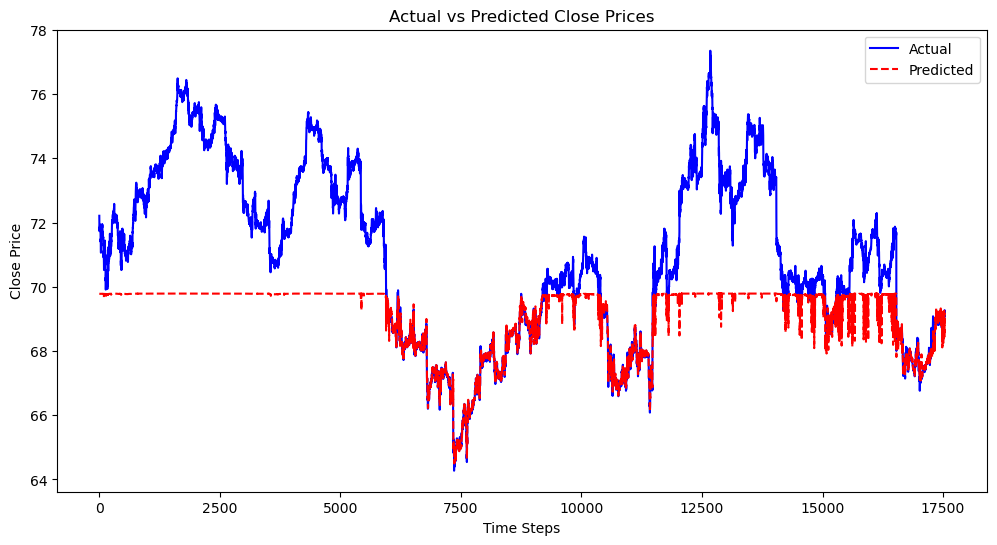

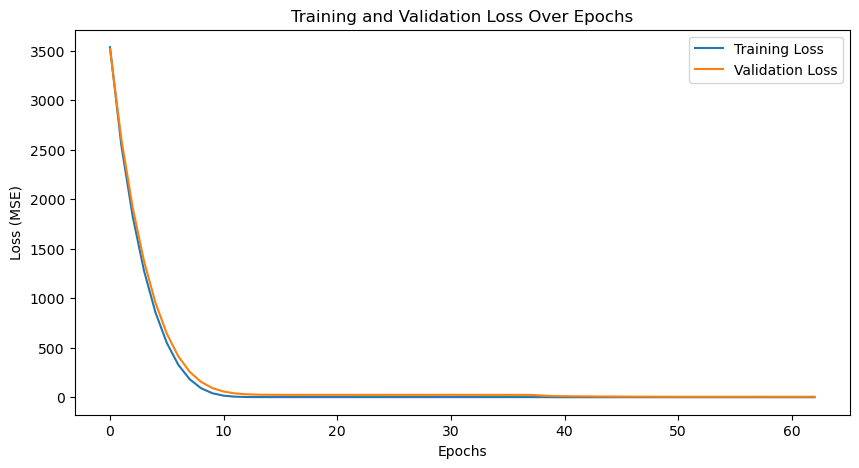

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load the training and testing data
training_data = pd.read_csv("3_month_training_data.csv")
testing_data = pd.read_csv("3_month_testing_data.csv")

# Preprocess data
training_data = training_data.drop(columns=["Unnamed: 0", "Date"])
testing_data = testing_data.drop(columns=["Unnamed: 0", "Date"])

# Separate features and target
X_train = training_data.drop(columns=["Close"]).values
y_train = training_data["Close"].values
X_test = testing_data.drop(columns=["Close"]).values
y_test = testing_data["Close"].values

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model with dropout and reduced learning rate
model = Sequential([
    Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout layer for regularization
    Dense(64, activation='sigmoid'),
    Dropout(0.2),
    Dense(32, activation='sigmoid'),
    Dense(1)  # Output layer for regression
])

# Compile the model with a reduced learning rate
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Callbacks for early stopping and reducing learning rate on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model with callbacks
history = model.fit(
    X_train, y_train,
    epochs=200,  # Increase epochs for better convergence
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate the model on the test set
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Neural Network MSE: {mse:.2f}")
print(f"Neural Network MAE: {mae:.2f}")

# Visualization for Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual", color="blue")
plt.plot(y_pred, label="Predicted", color="red", linestyle="dashed")
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Time Steps")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# Visualization of Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

In [ ]:
## Now we are going to extract a larger training data set.

In [73]:
## TRAINING DATA PULL (July 2021 - July 2024 - 5 mins - 3 years of data)

from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract
import threading
import time
import pandas as pd

class IBApi(EWrapper, EClient):
    def __init__(self):
        EClient.__init__(self, self)
        self.data = []  # Store data
        self.data_retrieved = False  # Flag to check if data retrieval is complete

    def historicalData(self, reqId, bar):
        self.data.append({
            "Date": bar.date,
            "Open": bar.open,
            "High": bar.high,
            "Low": bar.low,
            "Close": bar.close,
            "Volume": bar.volume
        })

    def historicalDataEnd(self, reqId, start, end):
        print("Historical Data Ended")
        self.df = pd.DataFrame(self.data)
        self.data_retrieved = True  # Set the flag to True to indicate data retrieval completion
        self.disconnect()

class IBApp:
    def __init__(self):
        self.app = IBApi()

    def connect(self):
        self.app.connect("127.0.0.1", 7496, 0)
        thread = threading.Thread(target=self.run_app, daemon=True)
        thread.start()
        time.sleep(1)

    def run_app(self):
        self.app.run()

    def request_training_data(self):
        contract = Contract()
        contract.symbol = "CL"
        contract.secType = "FUT"
        contract.exchange = "NYMEX"
        contract.currency = "USD"
        contract.lastTradeDateOrContractMonth = "202412"  # November 2024 contract

        # Set parameters for data pull
        end_date = "20230730 23:59:59 UTC"  # Example end date in UTC
        duration = "3 Y"  # 5 Year Duration
        bar_size = "5 mins"

        # Record start time
        start_time = time.time()

        # Request historical data
        self.app.reqHistoricalData(
            reqId=1,
            contract=contract,
            endDateTime=end_date,
            durationStr=duration,
            barSizeSetting=bar_size,
            whatToShow='TRADES',
            useRTH=0,
            formatDate=1,
            keepUpToDate=False,
            chartOptions=[]
        )

        # Wait until data retrieval is complete
        while not self.app.data_retrieved:
            time.sleep(0.1)  # Small sleep interval to prevent busy-waiting

        # Record end time and calculate elapsed time
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Time taken to pull data: {elapsed_time:.2f} seconds")

    def disconnect(self):
        self.app.disconnect()

# Instantiate and connect the app
app = IBApp()
app.connect()

# Request training data
app.request_training_data()

# Access the DataFrame
train_data = app.app.df if hasattr(app.app, 'df') else pd.DataFrame()

# Disconnect from API
app.disconnect()

# Display the training data
print(train_data.head())

ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:usfuture
ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefnj


Historical Data Ended
Time taken to pull data: 678.25 seconds
                 Date   Open   High    Low  Close  Volume
0  20200803  10:50:00  47.13  47.13  47.13  47.13       1
1  20200803  10:55:00  47.13  47.13  47.13  47.13       4
2  20200803  11:00:00  47.18  47.18  47.18  47.18       1
3  20200803  11:05:00  47.18  47.18  47.18  47.18       8
4  20200803  11:10:00  47.18  47.18  47.18  47.18       0


In [78]:
train_data.to_csv("3_years_training_data.csv")

In [ ]:
# now lets run the same tests using a much larger training set

In [84]:
# relu method

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load the training and testing data
training_data = pd.read_csv("3_years_training_data.csv")
testing_data = pd.read_csv("3_month_testing_data.csv")

# Preprocess data
training_data = training_data.drop(columns=["Unnamed: 0", "Date"])
testing_data = testing_data.drop(columns=["Unnamed: 0", "Date"])

# Separate features and target
X_train = training_data.drop(columns=["Close"]).values
y_train = training_data["Close"].values
X_test = testing_data.drop(columns=["Close"]).values
y_test = testing_data["Close"].values

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,  # Increase epochs if necessary
    batch_size=32,
    validation_split=0.2,  # Use 20% of training data for validation
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Neural Network MSE: {mse:.2f}")
print(f"Neural Network MAE: {mae:.2f}")

# Optionally, view a few predictions
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(predictions.head())

Epoch 1/100


C:\Users\gwitt\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3443/3443 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 572.8583 - mae: 11.6309 - val_loss: 0.3461 - val_mae: 0.1569
Epoch 2/100
3443/3443 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0180 - mae: 0.0547 - val_loss: 0.0547 - val_mae: 0.0683
Epoch 3/100
3443/3443 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0236 - mae: 0.0682 - val_loss: 3.1116 - val_mae: 0.4845
Epoch 4/100
3443/3443 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0340 - mae: 0.0836 - val_loss: 0.0266 - val_mae: 0.0549
Epoch 5/100
3443/3443 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0390 - mae: 0.0687 - val_loss: 0.2596 - val_mae: 0.1420
Epoch 6/100
3443/3443 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0235 - mae: 0.0592 - val_loss: 0.0114 - val_mae: 0.0722
Epoch 7/100
3443/3443 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0197 - mae: 0.0535 - val_loss: 0.0157 - val_mae: 0.0416
Epoch 8/100
3443/3443 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0125 - mae: 0.0491 - val_loss: 0.0114 - val_mae: 0.0532
Epoch 9/100
3443/3443 ━━━━━━━━━━━━━━━━━━

In [86]:
# sigmoid

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load the training and testing data
training_data = pd.read_csv("3_years_training_data.csv")
testing_data = pd.read_csv("3_month_testing_data.csv")

# Preprocess data
training_data = training_data.drop(columns=["Unnamed: 0", "Date"])
testing_data = testing_data.drop(columns=["Unnamed: 0", "Date"])

# Separate features and target
X_train = training_data.drop(columns=["Close"]).values
y_train = training_data["Close"].values
X_test = testing_data.drop(columns=["Close"]).values
y_test = testing_data["Close"].values

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dense(32, activation='sigmoid'),
    Dense(16, activation='sigmoid'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,  # Increase epochs if necessary
    batch_size=32,
    validation_split=0.2,  # Use 20% of training data for validation
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Neural Network MSE: {mse:.2f}")
print(f"Neural Network MAE: {mae:.2f}")

# Optionally, view a few predictions
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(predictions.head())

Epoch 1/100


C:\Users\gwitt\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3443/3443 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 3297.1851 - mae: 56.0110 - val_loss: 1020.7242 - val_mae: 31.8577
Epoch 2/100
3443/3443 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 693.4044 - mae: 24.0952 - val_loss: 62.8939 - val_mae: 7.5552
Epoch 3/100
3443/3443 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 83.8230 - mae: 7.4161 - val_loss: 0.0635 - val_mae: 0.1529
Epoch 4/100
3443/3443 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 1.6463 - mae: 0.4935 - val_loss: 0.0113 - val_mae: 0.0622
Epoch 5/100
3443/3443 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0907 - mae: 0.0778 - val_loss: 0.0125 - val_mae: 0.0966
Epoch 6/100
3443/3443 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0057 - mae: 0.0355 - val_loss: 0.0071 - val_mae: 0.0654
Epoch 7/100
3443/3443 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0020 - mae: 0.0287 - val_loss: 0.0049 - val_mae: 0.0308
Epoch 8/100
3443/3443 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0016 - mae: 0.0262 - val_loss: 0.0044 - val_mae: 0.0338
Epoch 9/100
3443/3443 ━━━━━━━━

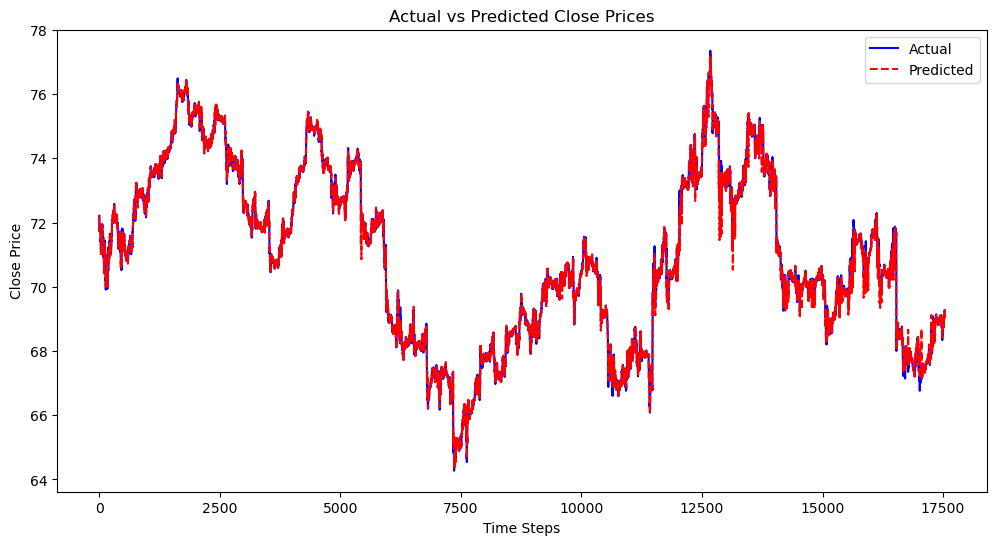

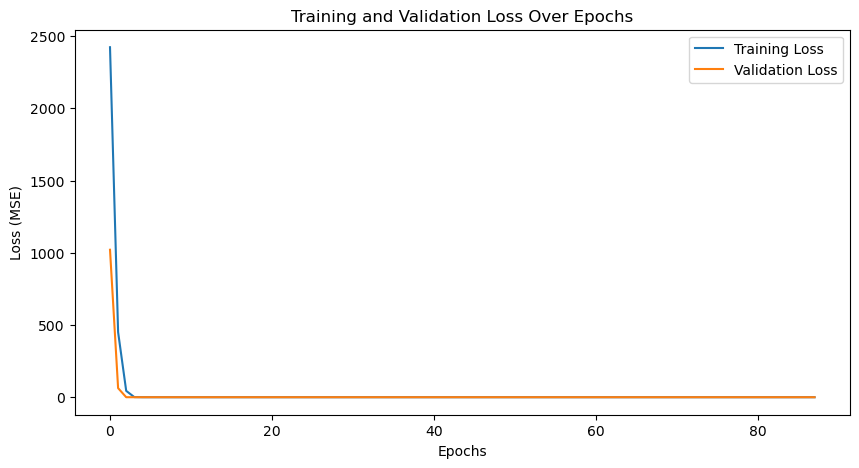

In [88]:
# Visualization for Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual", color="blue")
plt.plot(y_pred, label="Predicted", color="red", linestyle="dashed")
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Time Steps")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# Visualization of Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()